In [148]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [149]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

In [150]:
df = pd.read_csv('data/train.csv')

In [151]:
df['Date'] = pd.to_datetime( df['Date']) # Convert date into datetime format
df['Num_Days'] = ( df['Date'] - df['Date'][0] ).dt.days # Add a coulmn for number of days from the first reported case.

In [152]:
#--- Some info about the data set.
df.info()
df.columns
df.index

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19698 entries, 0 to 19697
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              19698 non-null  int64         
 1   Province_State  8375 non-null   object        
 2   Country_Region  19698 non-null  object        
 3   Date            19698 non-null  datetime64[ns]
 4   ConfirmedCases  19698 non-null  float64       
 5   Fatalities      19698 non-null  float64       
 6   Num_Days        19698 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 1.1+ MB


RangeIndex(start=0, stop=19698, step=1)

In [153]:
#--- Check how many NAN are there.
print( "NAN count in [Province_state, Country_region, Date, ConfirmedCases, Fatalities]", [sum( df[i].isna() ) for i in df.columns])

NAN count in [Province_state, Country_region, Date, ConfirmedCases, Fatalities] [0, 11323, 0, 0, 0, 0, 0]


In [155]:
# Fill not-known data 
df = df.fillna( 'NoInfo')

In [156]:
df['Province_State'].unique()
# df['Country_Region'].unique()

array(['NoInfo', 'Australian Capital Territory', 'New South Wales',
       'Northern Territory', 'Queensland', 'South Australia', 'Tasmania',
       'Victoria', 'Western Australia', 'Alberta', 'British Columbia',
       'Manitoba', 'New Brunswick', 'Newfoundland and Labrador',
       'Nova Scotia', 'Ontario', 'Prince Edward Island', 'Quebec',
       'Saskatchewan', 'Anhui', 'Beijing', 'Chongqing', 'Fujian', 'Gansu',
       'Guangdong', 'Guangxi', 'Guizhou', 'Hainan', 'Hebei',
       'Heilongjiang', 'Henan', 'Hong Kong', 'Hubei', 'Hunan',
       'Inner Mongolia', 'Jiangsu', 'Jiangxi', 'Jilin', 'Liaoning',
       'Macau', 'Ningxia', 'Qinghai', 'Shaanxi', 'Shandong', 'Shanghai',
       'Shanxi', 'Sichuan', 'Tianjin', 'Tibet', 'Xinjiang', 'Yunnan',
       'Zhejiang', 'Faroe Islands', 'Greenland', 'French Guiana',
       'French Polynesia', 'Guadeloupe', 'Martinique', 'Mayotte',
       'New Caledonia', 'Reunion', 'Saint Barthelemy', 'St Martin',
       'Aruba', 'Curacao', 'Sint Maarten', 'A

In [157]:
# Make hierarchical labels
# df_r = df.groupby( ['Country_Region', 'Province_State'] )
df_r = df.set_index( ['Country_Region', 'Province_State'] )

In [158]:
df_r.loc['US']
# df_r.loc['US'].loc['Alabama']

,Id,Date,ConfirmedCases,Fatalities,Num_Days
Province_State,,,,,
Alabama,22401,2020-01-22,0.0,0.0,0
Alabama,22402,2020-01-23,0.0,0.0,1
Alabama,22403,2020-01-24,0.0,0.0,2
Alabama,22404,2020-01-25,0.0,0.0,3
Alabama,22405,2020-01-26,0.0,0.0,4
...,...,...,...,...,...
Wyoming,27763,2020-03-24,29.0,0.0,62
Wyoming,27764,2020-03-25,44.0,0.0,63
Wyoming,27765,2020-03-26,53.0,0.0,64


In [162]:
# To get names to plot
def search_country_province( country, province, df):
    # Search country
    out = []
    for CName in df['Country_Region'].unique():
        if re.search(country, CName):
            out.append(CName)
    print('Countries: ', out)
    # Search province
    out = []
    for PName in df['Province_State'].unique():
        if re.search(province, PName):
               out.append(PName)
    print('Province: ', out)

search_country_province( 'US', 'North', df)

Countries:  ['US']
Province:  ['Northern Territory', 'North Carolina', 'North Dakota']


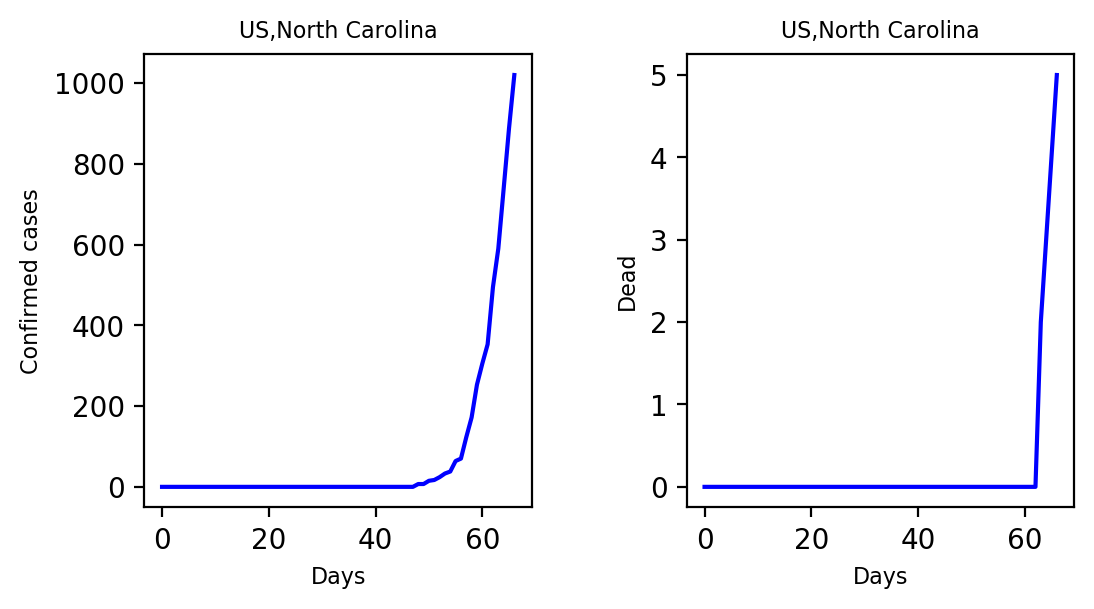

In [164]:
CName = 'US'
# PName = 'NoInfo'
PName = 'North Carolina'

df_p = df_r.loc[CName].loc[PName]

fig, ax = plt.subplots(1,2, figsize = (6,3), dpi=200)
# fig, ax = plt.subplots(1,2, dpi=200)
fig.subplots_adjust(wspace=0.4, hspace=0.0)
ax = ax.ravel()
fontl=8

ax[0].plot( df_p['Num_Days'], df_p['ConfirmedCases'],'-',color='b', label='Max T')
ax[1].plot( df_p['Num_Days'], df_p['Fatalities'],'-',color='b', label='Max T')

for iPlot in [0,1]:
    ax[iPlot].set_xlabel('Days', fontsize=fontl)
    ax[iPlot].set_title( CName + ',' + PName, fontsize=fontl)
    
    ax[0].set_ylabel('Confirmed cases', fontsize=fontl)
    ax[1].set_ylabel('Dead', fontsize=fontl)